In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
train_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Train" 
val_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Validation"
test_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test"

In [ ]:
model = VGG16(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
input_shape = (224,224)

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.01,
                                  zoom_range=[0.9, 1.25],
                                  horizontal_flip=True,
                                  vertical_flip=False)

datagen_val = ImageDataGenerator(rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 16

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,                                                 
                                                    shuffle=True)

generator_val = datagen_val.flow_from_directory(directory=val_dir,
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                shuffle=False)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 4468 images belonging to 2 classes.
Found 639 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

cls_train = generator_train.classes
cls_test = generator_test.classes


class_names = list(generator_train.class_indices.keys())
num_classes = generator_train.num_classes
num_classes

2

In [ ]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_3
True:	block1_conv1
True:	block1_conv2
True:	block1_pool
True:	block2_conv1
True:	block2_conv2
True:	block2_pool
True:	block3_conv1
True:	block3_conv2
True:	block3_conv3
True:	block3_pool
True:	block4_conv1
True:	block4_conv2
True:	block4_conv3
True:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_pool


**My codes stared**

**Visualizing Intermediate Representations**

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

**My Code ended**

In [ ]:
transfer_layer = model.get_layer('block5_pool')
conv_model = Model(inputs=model.input, outputs=transfer_layer.output)

**Inception er fully connected layer gula baad diye dichilam. So shobar last projonto jeta ache ota conv_model e save kore then amra nijera model create kore nibo**

In [ ]:
#for layer in conv_model.layers:
#    layer.trainable = False
    
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
new_model.add(Dropout(0.5))

new_model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
#new_model.add(Dense(512, activation='relu'))


# Add the final layer for the actual classification.
new_model.add(Dense(num_classes, activation='softmax'))


In [ ]:
optimizer = Adam(lr=1e-5)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
def print_layer_trainable():
    for layer in new_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	functional_5
True:	flatten_2
True:	dropout_2
True:	dense_4
True:	dense_5


In [ ]:
epochs = 10
#steps_per_epoch = 10
steps_per_epoch = generator_train.n / batch_size
steps_val = generator_val.n / batch_size
steps_test = generator_test.n / batch_size


history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

Epoch 1/10
280/279 [==============================] - 121s 431ms/step - loss: 0.3350 - accuracy: 0.8729 - val_loss: 0.6918 - val_accuracy: 0.8626
Epoch 2/10
280/279 [==============================] - 121s 432ms/step - loss: 0.1071 - accuracy: 0.9624 - val_loss: 0.8229 - val_accuracy: 0.8656
Epoch 3/10
280/279 [==============================] - 121s 431ms/step - loss: 0.0718 - accuracy: 0.9756 - val_loss: 0.4162 - val_accuracy: 0.8824
Epoch 4/10
280/279 [==============================] - 121s 431ms/step - loss: 0.0479 - accuracy: 0.9837 - val_loss: 0.3729 - val_accuracy: 0.9053
Epoch 5/10
280/279 [==============================] - 121s 432ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.8396 - val_accuracy: 0.8718
Epoch 6/10
280/279 [==============================] - 121s 431ms/step - loss: 0.0309 - accuracy: 0.9872 - val_loss: 0.2048 - val_accuracy: 0.9527
Epoch 7/10
280/279 [==============================] - 121s 431ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.2993 -

In [ ]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 96.34%


In [ ]:
import cv2
import os
from tqdm import tqdm

In [ ]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/Yes"

test_data = np.empty((1, 224, 224, 3))

for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
        
        #new_array = new_array.reshape((224, 224))
        
       
        new_array = new_array.reshape((-1, 224, 224, 3))
        #print(new_array.shape)
        test_data = np.append(test_data, new_array, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 229/229 [00:06<00:00, 34.34it/s]


In [ ]:
test_data.shape

(230, 224, 224, 3)

In [ ]:
scaled_data = test_data/255
new_model.predict_classes(scaled_data)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/No"

test_data_2 = np.empty((1, 224, 224, 3))

for img_2 in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array_2 = cv2.imread(os.path.join(path,img_2))  # convert to array
        new_array_2 = cv2.resize(img_array_2, (224, 224))  # resize to normalize data size
        
        #new_array_2 = new_array.reshape((224, 224))
        
       
        new_array_2 = new_array_2.reshape((-1, 224, 224, 3))
        #print(new_array_2.shape)
        test_data_2 = np.append(test_data_2, new_array_2, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 426/426 [00:20<00:00, 21.28it/s]


In [ ]:
test_data_2.shape

(427, 224, 224, 3)

In [ ]:
scaled_data_2 = test_data_2/255
new_model.predict_classes(scaled_data_2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#new_model.save('/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/Yes')

<Figure size 432x288 with 0 Axes>

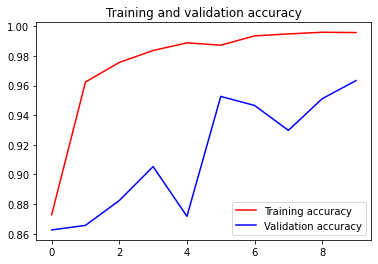

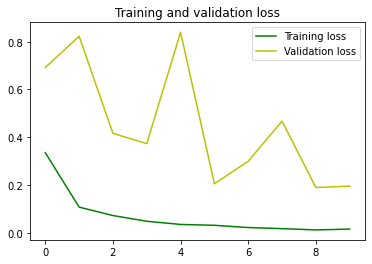

<Figure size 432x288 with 0 Axes>

In [ ]:


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[   'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------


plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()